# Pairplot
Generate the pairplot for 3 results of satisfaction

In [13]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("./Only Ordinal Encoded.csv")

data.head(5)

Gender  Home Location  Level of Education  Age(Years)  Number of Subjects  \
0     1.0            1.0                 2.0          18                  11   
1     1.0            1.0                 2.0          19                   7   
2     1.0            0.0                 2.0          18                   5   
3     1.0            1.0                 2.0          18                   5   
4     1.0            0.0                 2.0          18                   5   

   Device type used to attend classes  Economic status  Family size  \
0                                 1.0              0.0            4   
1                                 1.0              0.0            4   
2                                 1.0              0.0            5   
3                                 1.0              0.0            4   
4                                 1.0              0.0            4   

   Internet facility in your locality  Are you involved in any sports?  ...  \
0                                   5                              0.0  ...   
1                                   1                              1.0  ...   
2                                   2                              0.0  ...   
3                                   4                              1.0  ...   
4                                   3                              0.0  ...   

   Time spent on social media (Hours)  Interested in Gaming?  \
0                                   1                    0.0   
1                                   1                    1.0   
2                                   1                    0.0   
3                                   2                    0.0   
4                                   2                    1.0   

   Have separate room for studying?  Engaged in group studies?  \
0                               0.0                        0.0   
1                               1.0                        0.0   
2                               1.0                        0.0   
3                               0.0                        1.0   
4                               1.0                        1.0   

   Average marks scored before pandemic in traditional classroom  \
0                                                9.0               
1                                                9.0               
2                                                7.0               
3                                                9.0               
4                                                8.0               

   Your interaction in online mode  \
0                                1   
1                                1   
2                                1   
3                                1   
4                                3   

   Clearing doubts with faculties in online mode  Interested in?  \
0                                              1             1.0   
1                                              1             2.0   
2                                              1             0.0   
3                                              2             2.0   
4                                              3             0.0   

   Performance in online  Your level of satisfaction in Online Education  
0                      6                                               0  
1                      3                                               1  
2                      6                                               1  
3                      4                                               1  
4                      6                                               0  

[5 rows x 23 columns]

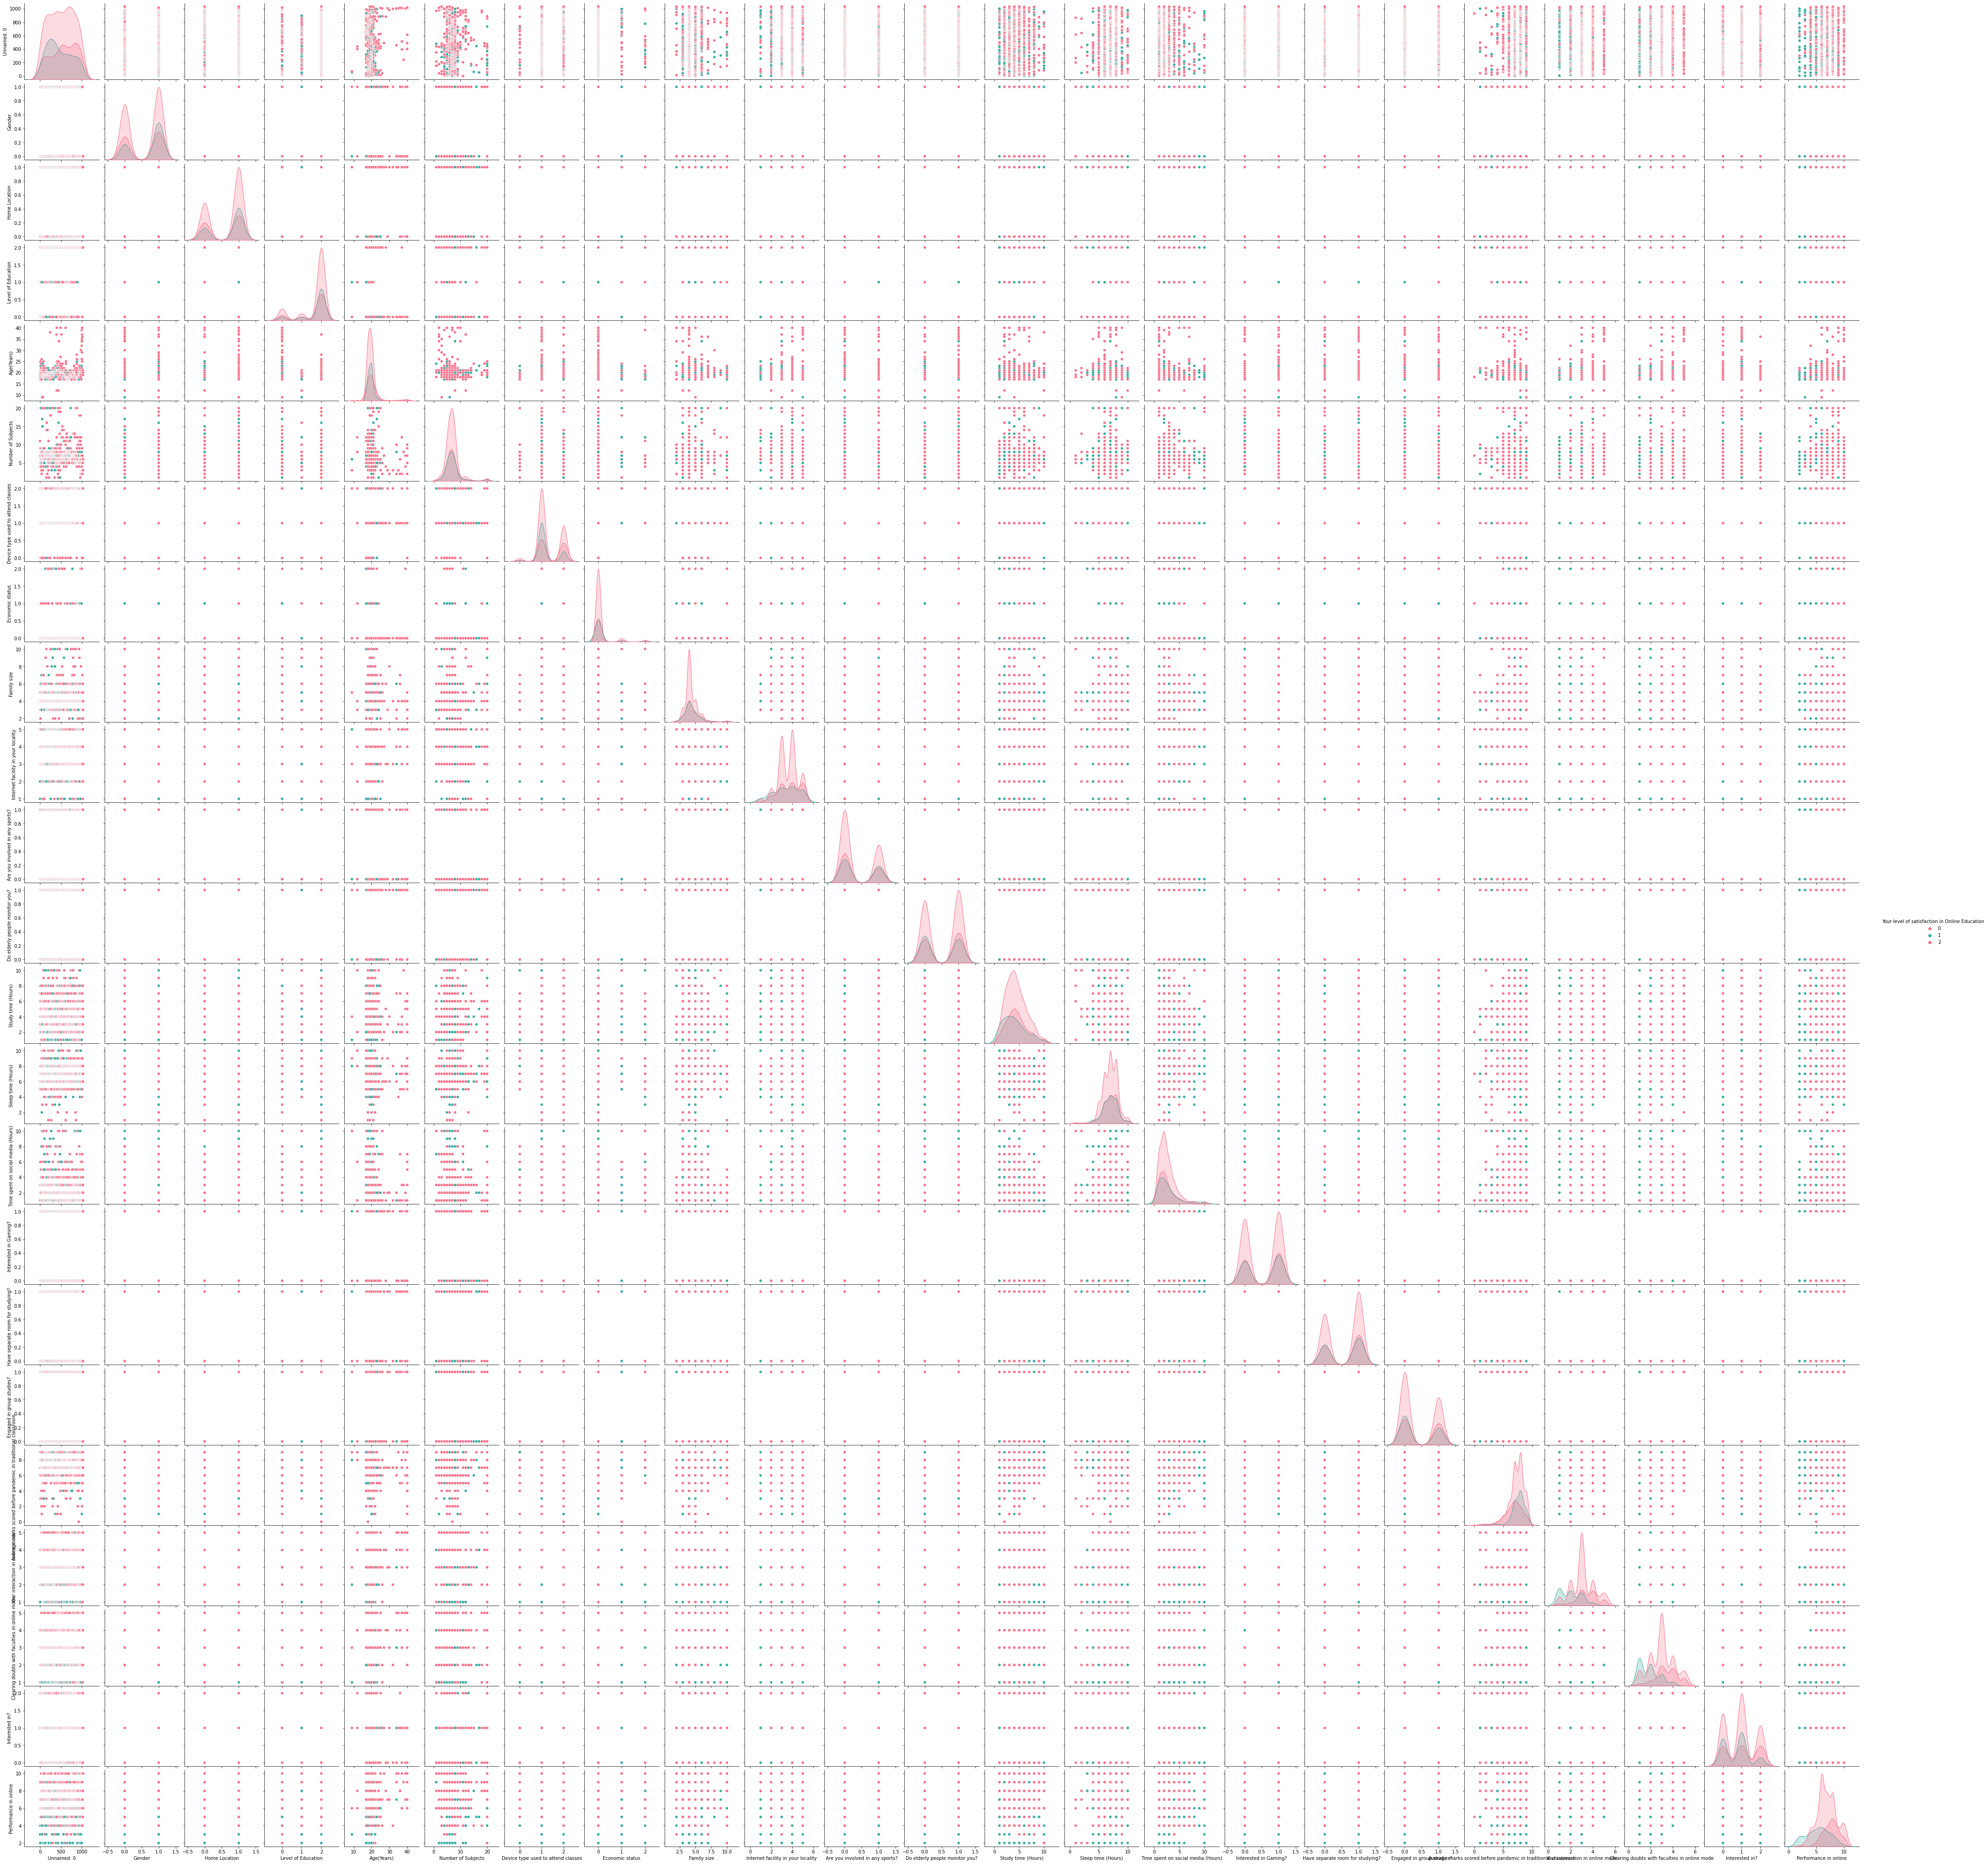

In [2]:
sns.pairplot(data=data, diag_kind='kde', hue='Your level of satisfaction in Online Education', kind='scatter', palette='husl')

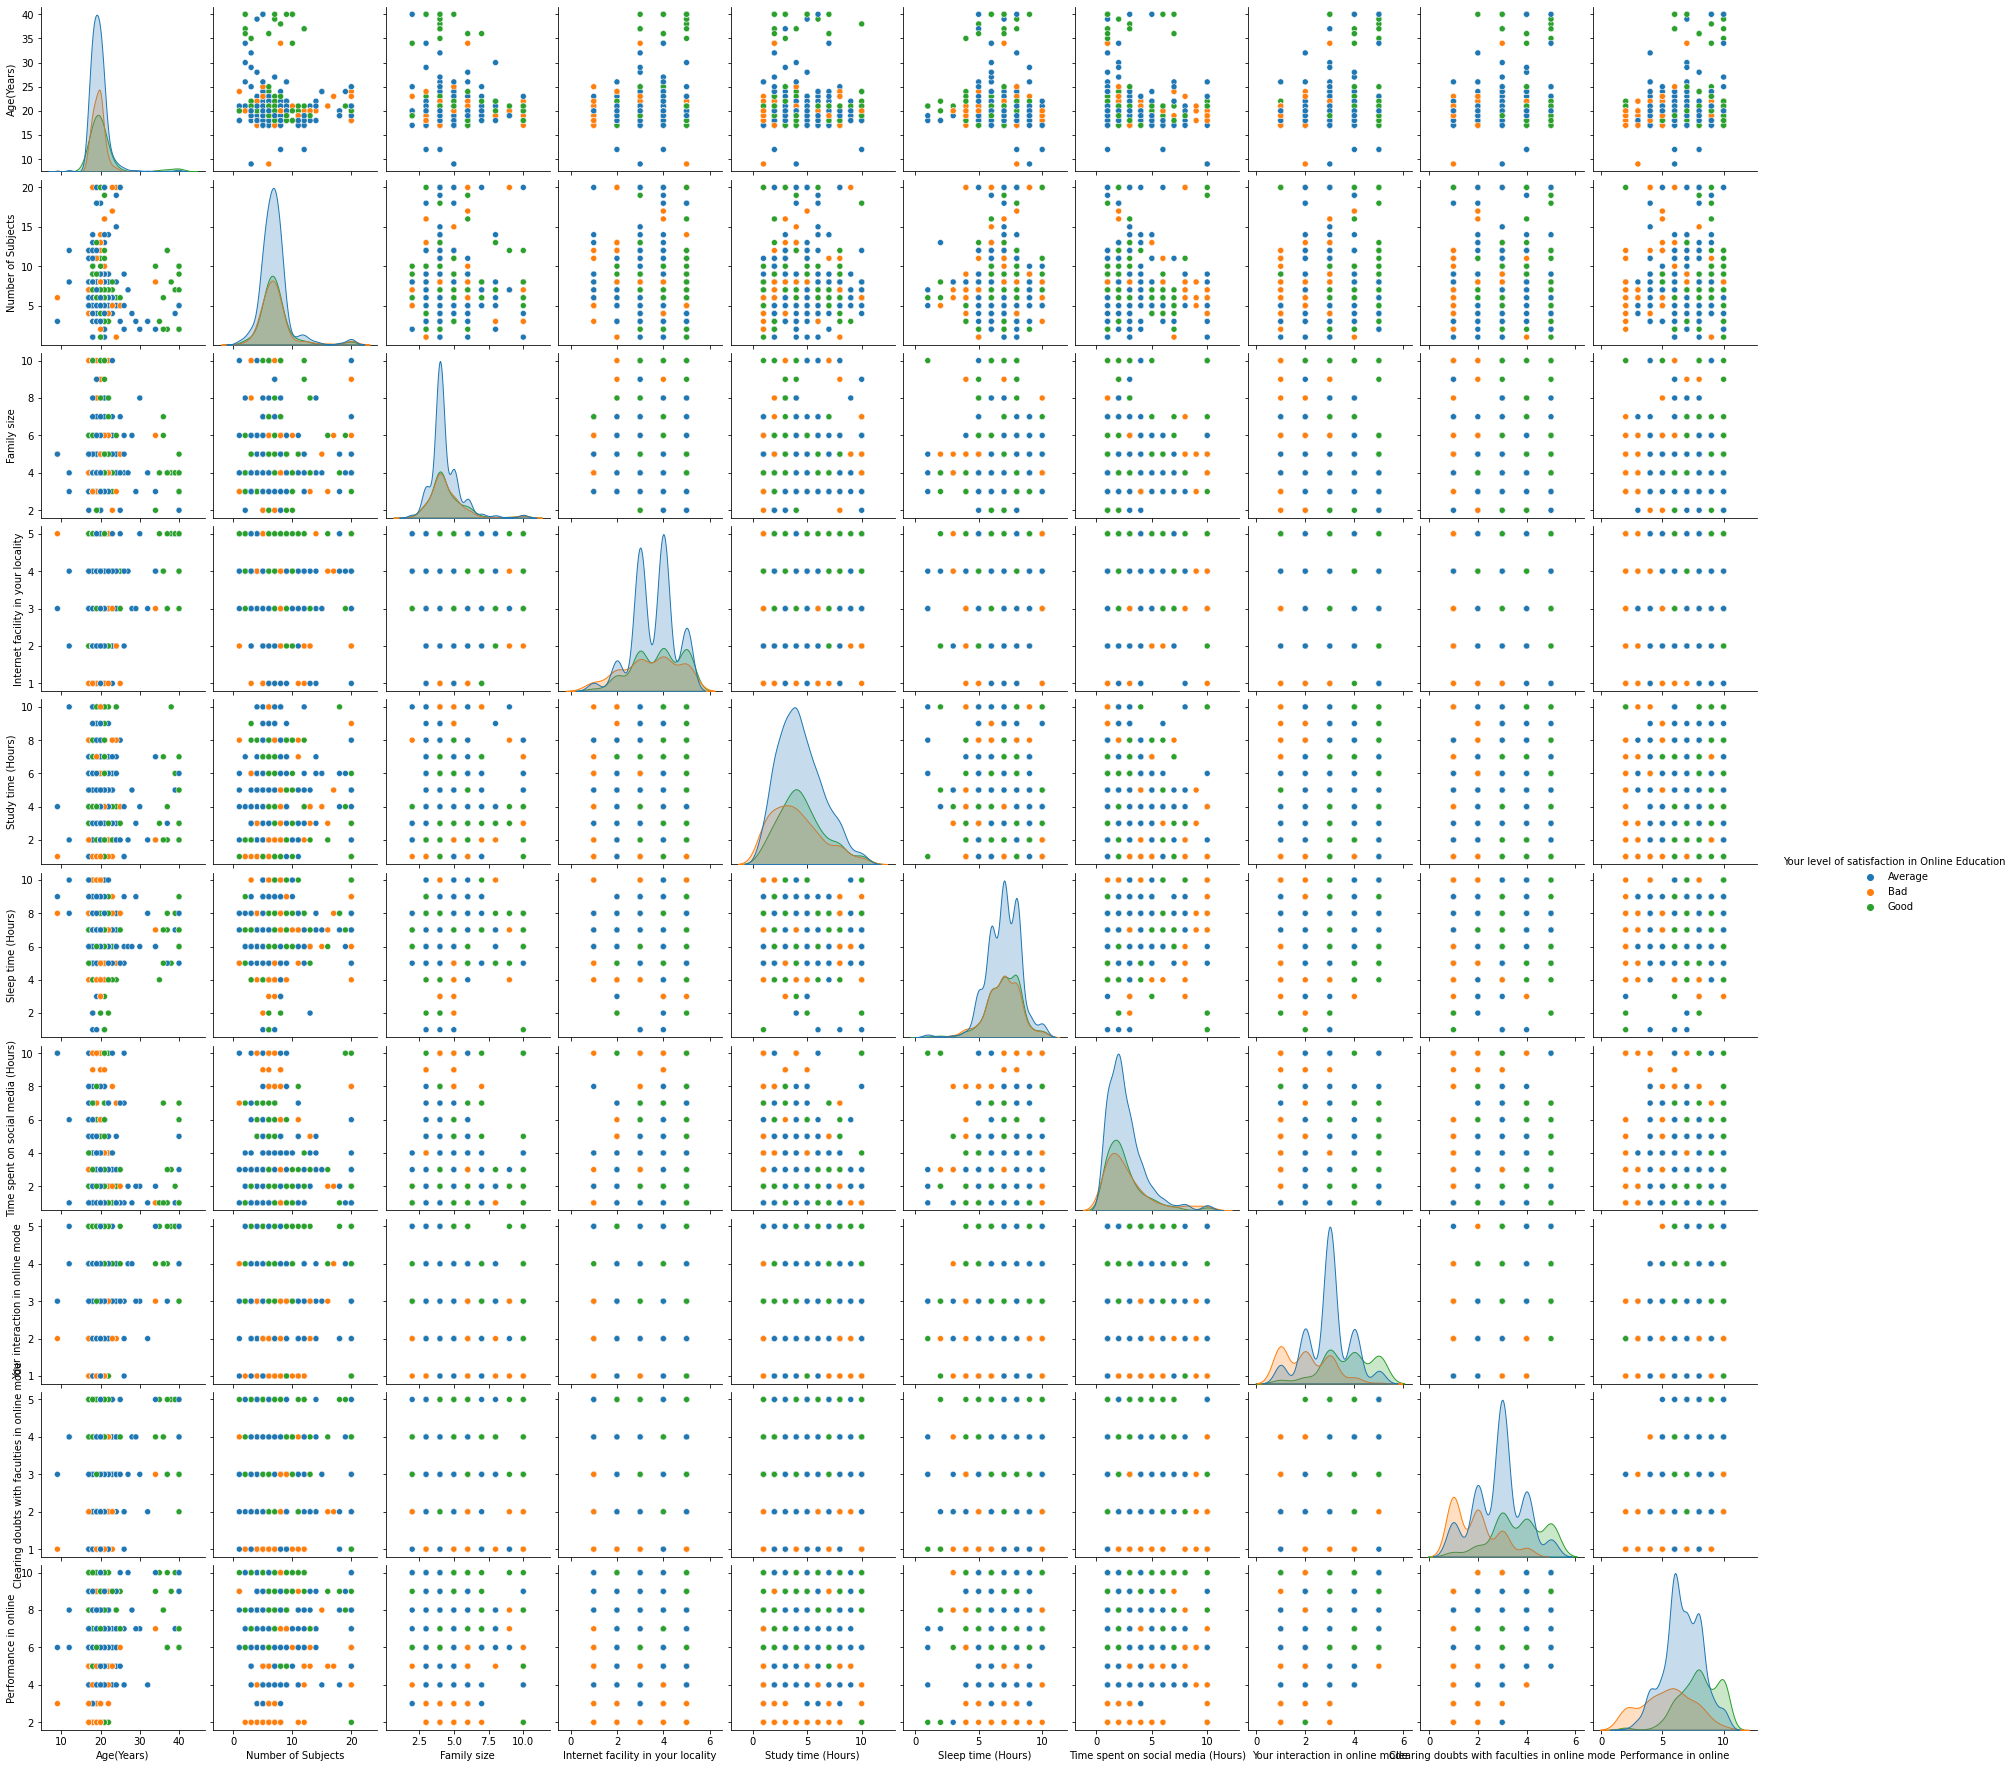

In [ ]:
data2 = pd.read_csv("./dataSet/ONLINE EDUCATION SYSTEM REVIEW.csv")
sns.pairplot(data=data2, diag_kind='kde', hue='Your level of satisfaction in Online Education')

The data density of all 3 overlap in many places. This will leads to very difficult in training our model to classified the overall satisfaction very hard.

# Imbalance Plot

<AxesSubplot:xlabel='Your level of satisfaction in Online Education', ylabel='count'>

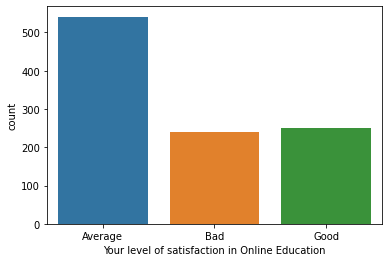

In [14]:
# Explore more analysis
data2 = pd.read_csv("./dataSet/ONLINE EDUCATION SYSTEM REVIEW.csv")
sns.countplot(x='Your level of satisfaction in Online Education', data=data2)

> No oversampling and scaling because lower the accuracy

In [27]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# ! Can only use encoded x data. Y data will need to be in normal form

X_train, X_test, y_train, y_test = train_test_split(data.drop('Your level of satisfaction in Online Education', axis=1), data['Your level of satisfaction in Online Education'], random_state=0)
# smote = SMOTE()
# 
# os_X_train, os_Y_train = smote.fit_resample(X_train, y_train)
# os_Y_train.value_counts()


0    413
1    413
2    413
Name: Your level of satisfaction in Online Education, dtype: int64

In [30]:
#Create the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

#Train the model and create predictions

# reg = model.fit(os_scaled_x_train, os_Y_train)
reg = model.fit(X_train, y_train)
predictions_test = reg.predict(X_test)

# Printing Predictions
print(predictions_test)

#Calculate performance metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_test))

#Generate a confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions_test))

[0 0 0 0 0 0 0 0 0 2 0 1 0 0 2 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 1 2 0 0 0 2 0 0 0 0 2 1 0 0 0 0 1 0 0 0 1 0 0 0 0 2 0 0 0 0 0 1 0 0 2
 0 0 1 0 0 0 1 0 0 0 0 0 1 1 2 1 0 2 0 0 0 0 2 0 1 0 1 0 1 2 0 2 1 0 0 0 0
 0 0 0 0 0 0 1 2 0 0 0 0 0 0 2 2 0 0 0 1 0 1 2 0 0 1 0 0 0 2 1 0 1 0 0 0 0
 0 2 0 0 2 0 0 0 0 0 1 0 0 2 2 0 0 1 1 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 1 1 0
 2 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 2 0 0 0 2 0 1 2 1 1 1 0 0 1 1 1 2 0
 0 2 1 0 0 0 0 0 1 0 2 0 2 2 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 2]
              precision    recall  f1-score   support

           0       0.58      0.81      0.68       128
           1       0.51      0.39      0.44        56
           2       0.78      0.39      0.52        75

    accuracy                           0.60       259
   macro avg       0.63      0.53      0.55       259
weighted avg       0.62      0.60      0.58       259

[[104  17   7]
 [ 33  22   1]
 [ 42   4  29]]


c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
